**Q1 Autoencoder for MNIST Digit Reconstruction**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3827 - val_loss: 0.1897
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1795 - val_loss: 0.1526
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1479 - val_loss: 0.1338
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1314 - val_loss: 0.1215
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1206 - val_loss: 0.1133
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1132 - val_loss: 0.1074
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1076 - val_loss: 0.1029
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1034 - val_loss: 0.0998
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1004 - val_loss: 0.0974
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0984 - val_loss: 0.0959
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0967 - val_loss: 0.0947


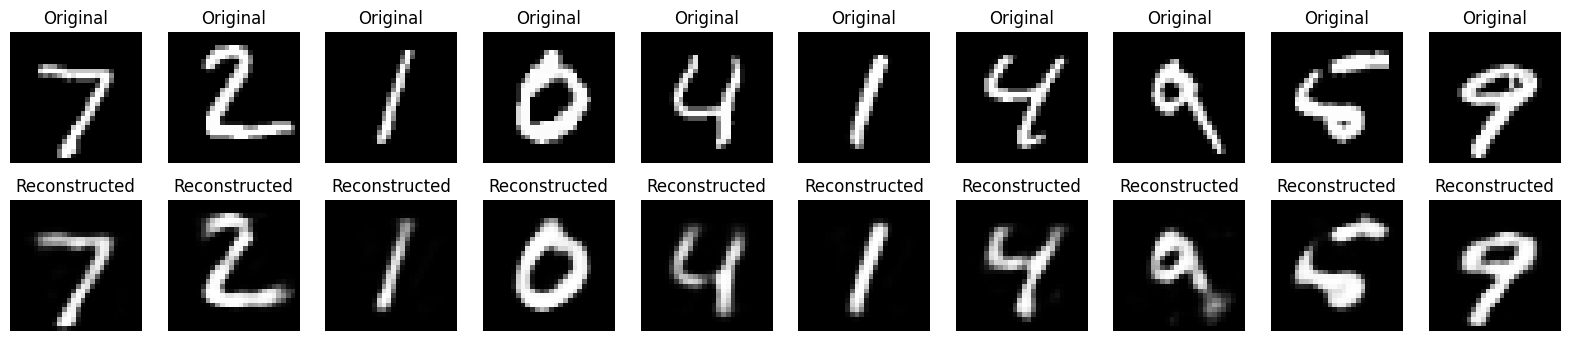

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), -1))  # shape (60000, 784)
x_test = x_test.reshape((len(x_test), -1))    # shape (10000, 784)

# Step 2: Define the autoencoder (encoder -> bottleneck -> decoder)
def build_autoencoder(latent_dim):
    input_img = Input(shape=(784,))

    # Encoder
    encoded = Dense(latent_dim, activation='relu')(input_img)

    # Decoder
    decoded = Dense(784, activation='sigmoid')(encoded)

    autoencoder = Model(inputs=input_img, outputs=decoded)
    return autoencoder

# Step 3: Compile and train the model
latent_dim = 32  # You can change this to 16 or 64 later
autoencoder = build_autoencoder(latent_dim)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Step 4: Reconstruct images
decoded_imgs = autoencoder.predict(x_test)

# Step 5: Plot original vs reconstructed
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


**Q2 : Denoising Autoencoder for MNIST**

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3649 - val_loss: 0.2212
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2087 - val_loss: 0.1801
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1757 - val_loss: 0.1616
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1593 - val_loss: 0.1502
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1490 - val_loss: 0.1427
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1423 - val_loss: 0.1375
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1378 - val_loss: 0.1340
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1345 - val_loss: 0.1306
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1309 - val_loss: 0.1286
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1293 - val_loss: 0.1276
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1278 - val_loss: 0.1261
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

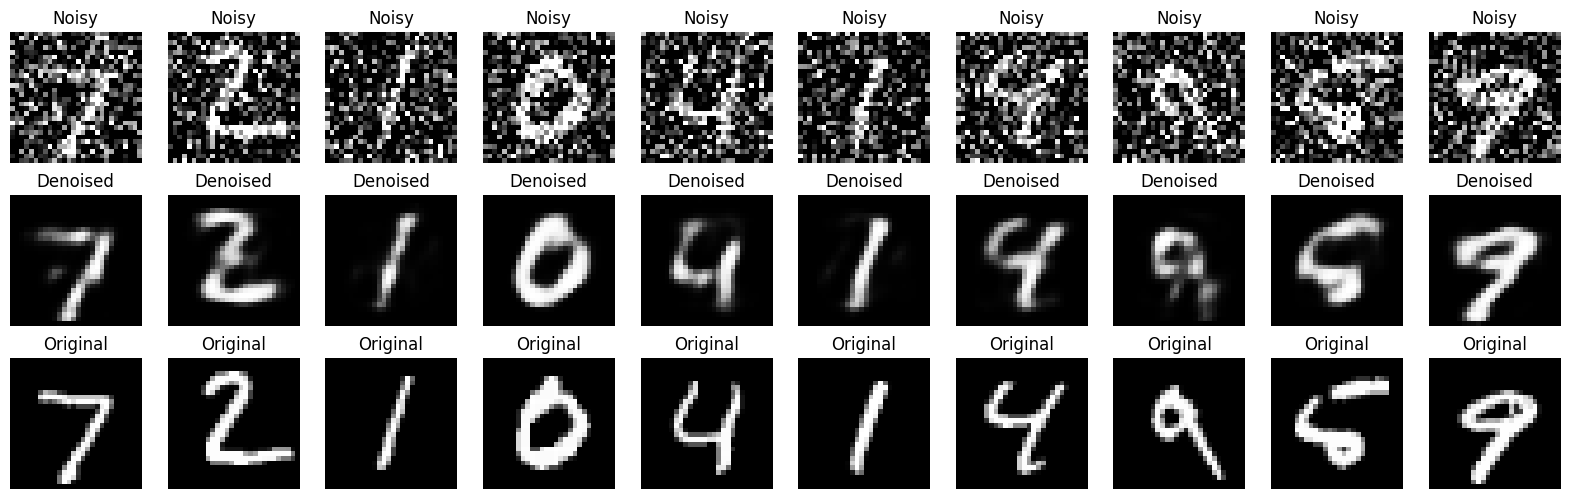

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Load and normalize data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Add Gaussian noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Step 2: Define the autoencoder (same structure as before)
def build_autoencoder(latent_dim):
    input_img = Input(shape=(784,))
    encoded = Dense(latent_dim, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    return Model(input_img, decoded)

# Step 3: Compile and train
latent_dim = 32
autoencoder = build_autoencoder(latent_dim)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Input: Noisy | Output: Clean
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Step 4: Predict on test set
decoded_imgs = autoencoder.predict(x_test_noisy)

# Step 5: Visualize (Noisy vs. Denoised)
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised output
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # Original for reference
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
plt.show()


**Q3 : Character-Level Text Generation using LSTM**

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
import random
import sys

# Step 1: Load and prepare text
path = tf.keras.utils.get_file("shakespeare.txt", "https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt")
text = open(path, 'rb').read().decode(encoding='utf-8').lower()
print(f"Corpus length: {len(text)}")

# Step 2: Character encoding
chars = sorted(list(set(text)))
char_indices = {c: i for i, c in enumerate(chars)}
indices_char = {i: c for i, c in enumerate(chars)}

maxlen = 40
step = 3
sentences = []
next_chars = []

# Create training sequences
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])

print(f"Number of sequences: {len(sentences)}")

x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool_)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

# Step 3: Define LSTM model
model = Sequential([
    LSTM(128, input_shape=(maxlen, len(chars))),
    Dense(len(chars), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

# Step 4: Train the model
model.fit(x, y, batch_size=128, epochs=10)

# Step 5: Generate text with temperature
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-8) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Generate text
def generate_text(seed, length=400, temp=1.0):
    generated = seed
    sentence = seed.lower()
    for _ in range(length):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices.get(char, 0)] = 1
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature=temp)
        next_char = indices_char[next_index]
        generated += next_char
        sentence = sentence[1:] + next_char
    return generated

seed_text = "the sun sets over the silent hill, "
print(generate_text(seed_text, temp=0.5))


1115394/1115394 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
Corpus length: 1115394
Number of sequences: 371785


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          86,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 39)                  │           5,031 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,047 (355.65 KB)

 Trainable params: 91,047 (355.65 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 2.5775
Epoch 2/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 1.9891
Epoch 3/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 1.8160
Epoch 4/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 1.7194
Epoch 5/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 1.6510
Epoch 6/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 1.6012
Epoch 7/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.5642
Epoch 8/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 1.5273
Epoch 9/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 1.5012
Epoch 10/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 1.4803
the sun sets over the silent hill, eeeeeeeeeeeyeee
ieaea eeeeeeeaeeiaeeeeiaeeeeeesee
oeaieee eeeoeeeeaenfisallee
eaeaioeeeaeiteeaeeeeleeeeesee
eeaelaeoeeeteeeeeseeeaaaceyeeeleeaesesryeeees
eeeeeeesinseesesnsssssssesss.eeeeaaeeeeesoe
eeieeeeeisoaeeaseeeseelaeleeseleeeeesoee
eeaaareeeeeeeaieeeeeeeeel

**Q4 : Sentiment Classification using LSTM (IMDB)**

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.7068 - loss: 0.5356 - val_accuracy: 0.8374 - val_loss: 0.3809
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.8726 - loss: 0.3103 - val_accuracy: 0.7708 - val_loss: 0.4633
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8926 - loss: 0.2739 - val_accuracy: 0.8710 - val_loss: 0.3287
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9462 - loss: 0.1542 - val_accuracy: 0.8690 - val_loss: 0.3508
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9705 - loss: 0.0982 - val_accuracy: 0.8682 - val_loss: 0.3898
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.87      0.87     12500
    Positive       0.87      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       

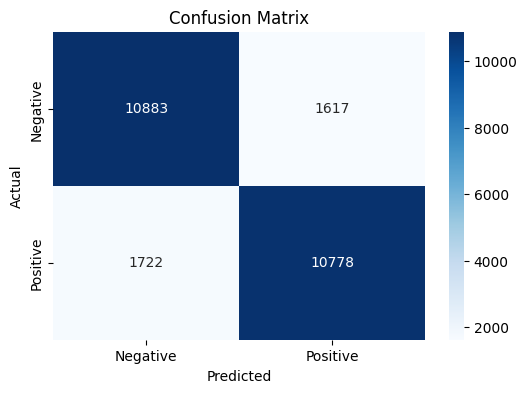

In [4]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load IMDB data (top 10,000 words)
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Step 2: Preprocess - pad sequences
maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Step 3: Define LSTM model
model = Sequential([
    Embedding(num_words, 128, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Step 4: Evaluation
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
